1.8494676169797013
1.330356401299558
0.0


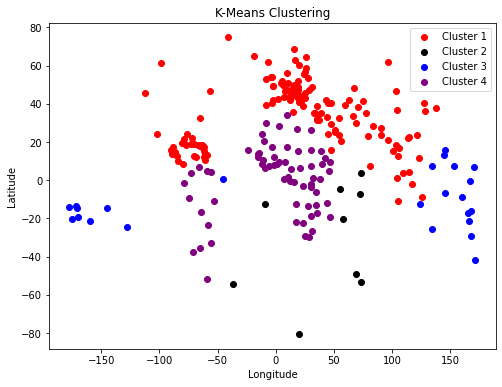

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#helper functions

def init_centroids(k,x):
  arr = []
  for i in range(k):
    cx1 = np.random.uniform(min(x),max(x))
    arr.append(cx1)
  return np.asarray(arr)
  
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

def assign_cluster(k,x,cg):
  cluster = [-1]*len(x)
  for i in range(len(x)):
    dist_arr = []
    for j in range(k):
      dist_arr.append(euclidean_distance(x[i],cg[j]))
      idx = np.argmin(dist_arr)
      cluster[i] = idx
  return np.asarray(cluster)  

def compute_centroids(k, X, cluster):
  cg_arr = []
  for i in range(k):
      arr = []
      for j in range(len(X)):
          if cluster[j]==i:
              arr.append(X[j])
      cg_arr.append(np.mean(arr, axis=0))
  return np.asarray(cg_arr)

def measure_change(cg_prev, cg_new):
  res = 0
  for a,b in zip(cg_prev,cg_new):
    res+=euclidean_distance(a,b)
  return res    

def show_clusters(df):
  fig, ax = plt.subplots(figsize=(8, 6))
  df1 = df[df.continent == 0]
  df2 = df[df.continent == 1]
  df3 = df[df.continent == 2]
  df4 = df[df.continent == 3]
  ax.scatter(df1.Longitude,df1.Latitude,color = 'Red',label = 'Cluster 1')
  ax.scatter(df2.Longitude,df2.Latitude,color = 'Black',label = 'Cluster 2')
  ax.scatter(df3.Longitude,df3.Latitude,color = 'Blue',label = 'Cluster 3')
  ax.scatter(df4.Longitude,df4.Latitude,color = 'Purple',label = 'Cluster 4')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.title('K-Means Clustering')
  plt.legend(loc="upper right")
  plt.show()

def kmeans(k,x):
  cg_prev = init_centroids(k,x)
  cluster = 0*len(x)
  cg_change = 100
  while cg_change > 0.001:
      cluster = assign_cluster(k,x,cg_prev)
      cg_new = compute_centroids(k,x,cluster) 
      cg_change = measure_change(cg_new, cg_prev)
      print(cg_change)
      cg_prev = cg_new   
  return cluster  

def main():
  df = pd.read_csv('/content/Categorical.csv')
  values = df.values.tolist()
  df['continent'] = df.loc[:, 'continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
  data = df['continent']
  np.random.seed(42)
  k,x = 4,data.to_numpy()
  cluster = kmeans(k,x)
  df['continent'] = cluster
  show_clusters(df)


if __name__ == "__main__":
  main()
  


241


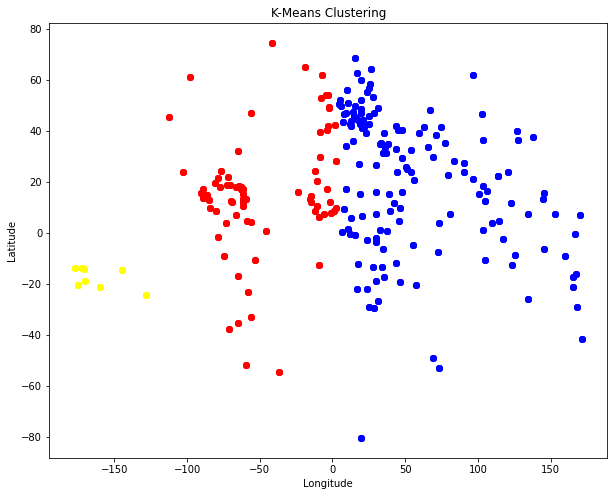

In [140]:

import pandas as pd
import numpy as np

def init_centroids(x,k):
  x = np.array(x)
  arr = []
  for i in range(k):
    cx1 = np.random.uniform(min(x[:,0]),max(x[:,1]))
    cx2 = np.random.uniform(min(x[:,0]),max(x[:,1]))
    arr.append([cx1,cx2])  
  return np.asarray(arr)

def euclidean_distance(x,y):
  return np.sqrt(np.sum(np.square(x-y)))
    
def assign_cluster(k,x,prev_centroids):
   x = np.array(x)
   cluster = []
   for i in range(len(x)):
     dist_arr = []
     for j in range(k):
      dist = euclidean_distance(x[i],prev_centroids[j])
      dist_arr.append(dist)
     min = np.argmin(dist_arr) 
     cluster.append(min)
   return np.asarray(cluster)

def measure_change(k,prev_centroids,new_centroids):
  change = 0
  for i in range(k):
   change+= euclidean_distance(prev_centroids[i],new_centroids[i])
  return change


def compute_centroids(k,x,cluster):
  new_centroids = []
  x = np.array(x)
  for i in range(k):
    arr = []
    for j in range(len(x)):
      if i == cluster[j]:
        arr.append(x[j])
    centroids = np.mean(arr,axis = 0)
    new_centroids.append(centroids) 
  return np.asarray(new_centroids)


def show_clusters(k):
  colors = ["red","blue","yellow","green","purple","black"]
  fig, ax = plt.subplots(figsize=(10, 8))
  for i in range(k):
    df1 = df[df.cluster == i]
    for p in df1:
      plt.scatter(df1.Longitude,df1.Latitude,color = colors[i] )

  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.title('K-Means Clustering')
  plt.show()

def kmeans(k,x):
  
  prev_centroids = init_centroids(x,k)
  cluster_change = 100
  while cluster_change > 0.001:
    cluster = assign_cluster(k,x,prev_centroids)
    new_centroids = compute_centroids(k,x,cluster)
    cluster_change = measure_change(k,prev_centroids,new_centroids)
    prev_centroids = new_centroids
  df['cluster'] = cluster
  show_clusters(k)

df = pd.read_csv('/content/Categorical.csv')
df = df.drop(['name','continent'],axis=1)
df = df.dropna()
print(len(df))
k = 3
np.random.seed(42)
kmeans(k,df)
